In [1]:
import os
os.chdir('..')

In [2]:
import diag_vae.constants as const
import pandas as pd
from diag_vae.vanilla_tcn_ae import VanillaTcnAE
from diag_vae.diag_tcn_ae import DiagTcnAE
from diag_vae.diag_tcn_ae_predictor import DiagTcnAePredictor
from diag_vae.berfipl_datamodule import BERFIPLDataModule, BERFIPLDataSet
import matplotlib.pyplot as plt
import torch
import numpy as np
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import tqdm

Global seed set to 42


In [3]:
loggs_dir = './logs/DiagTcnAE/version_26/checkpoints/'
checkpoint = os.path.join(loggs_dir, f'{os.listdir(loggs_dir)[0]}')
diag_ae_model = DiagTcnAE.load_from_checkpoint(checkpoint)

In [5]:
x.shape

torch.Size([154, 0])

In [22]:
SAMPLE_IDX = 1000
# SAMPLE_IDX = 350000

ds = BERFIPLDataSet(
        cols=const.BERFIPL_COLS,
        symbols_dct=const.BERFIPL_SIGNALS_MAP,
        data_path=const.BERFIPL_RAW_DATA_PATH_NORMAL,
        seq_len_x=1000,
        split='train'
)

x, x_comp_list, _ = ds.__getitem__(SAMPLE_IDX)
z_diag_ae = diag_ae_model.encode(x)
x_diag_ae_hat_ls = diag_ae_model.decode(z_diag_ae)

In [23]:
x_comp_list[0].shape[0]

5

In [24]:
x_diag_ae_hat_ls[COMP].detach().numpy().shape

(1, 5, 1000)

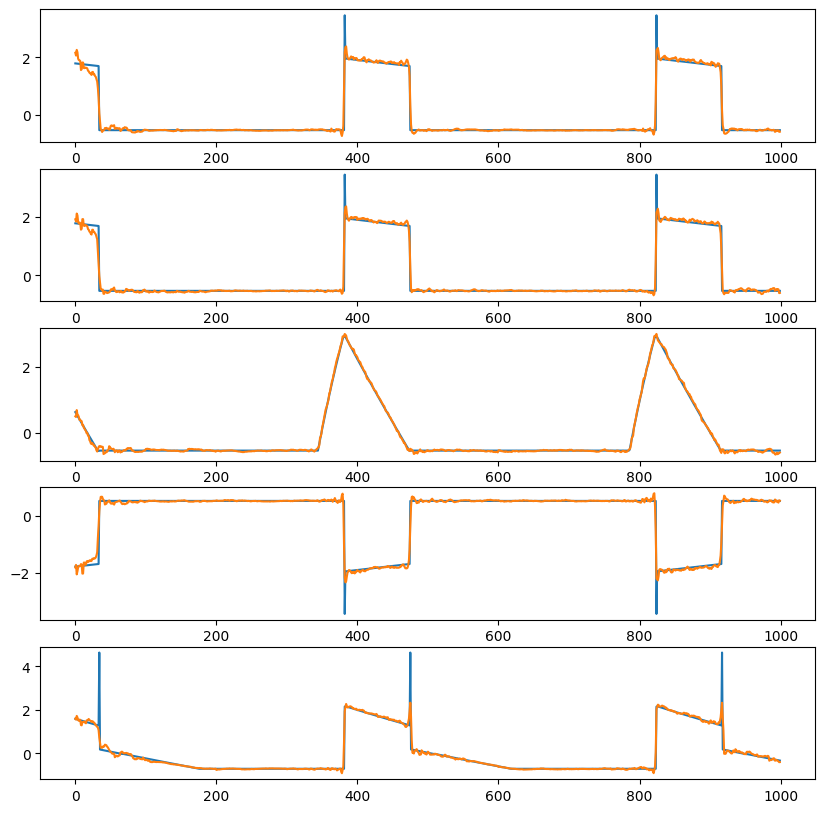

In [25]:
COMP = 0
num_sigs = x_comp_list[COMP].shape[0]
fig, axs = plt.subplots(num_sigs, 1, figsize=(10, 10))
for i in range(num_sigs):
    axs[i].plot(x_comp_list[COMP][i,:])
    axs[i].plot(x_diag_ae_hat_ls[COMP].detach().numpy()[0,i,:])
fig.show()

In [41]:
x.shape

torch.Size([154, 0])

In [49]:
test_data_paths = ['./data/raw/data/ds1/ds1c.csv',
                   './data/raw/data/ds1/ds1l.csv',
                   './data/raw/data/ds1/ds1lc.csv']

ds_c, ds_l, ds_lc = [BERFIPLDataSet(
        cols=const.BERFIPL_COLS,
        symbols_dct=const.BERFIPL_SIGNALS_MAP,
        data_path=path,
        seq_len_x=1000,
        split='train',
        val_split=.99
) for path in test_data_paths]
SAMPLE_IDX = len(ds_l)



In [71]:
len(ds_c)

3191

In [73]:
list(range(0,3191))[::100]

32

In [76]:
recon_c_ls = []
for idx in list(range(0,3191))[::10]:
    with torch.no_grad():
        x, x_comp_list, _ = ds_c.__getitem__(idx)
        # z_diag_ae = diag_ae_model.encode(x)
        # x_diag_ae_hat_ls = diag_ae_model.decode(z_diag_ae)
        out = diag_ae_model.predict_step((x, x_comp_list, _), batch_idx=1)
        
        recon_c_ls.append(torch.cat(out).numpy())

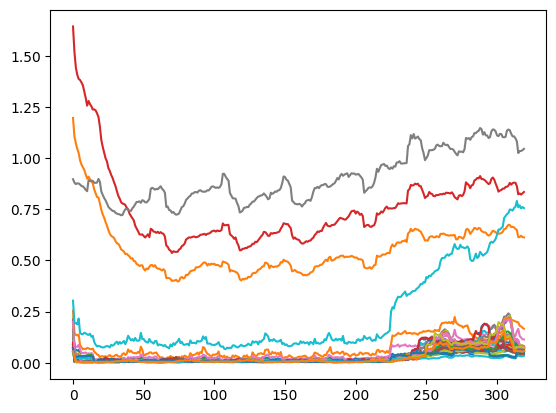

In [77]:
plt.plot(np.stack(recon_c_ls, axis=1).T)

In [66]:
recon_c_ls

[array([0.12648566, 0.25481027, 0.0714846 , 1.643032  , 0.18838987,
        0.07441419, 0.15281497, 0.20878744, 0.22393632, 0.08050649,
        0.06124228, 1.1959982 , 0.07046347, 0.08655801, 0.21175876,
        0.08529936, 0.08369224, 0.08828309, 0.08877514, 0.30351278,
        0.09817823, 0.195098  , 0.16260542, 0.09692401, 0.05270165,
        0.071006  , 0.19955112, 0.89687955, 0.0469659 , 0.0523255 ,
        0.07163976, 0.05595618], dtype=float32),
 array([0.11784917, 0.23383062, 0.06705714, 1.6287773 , 0.16773602,
        0.06980674, 0.141738  , 0.18871696, 0.20475551, 0.07260655,
        0.05756602, 1.1798974 , 0.06610233, 0.08157671, 0.19850257,
        0.07906877, 0.07532408, 0.07994831, 0.08672003, 0.28244832,
        0.08831089, 0.17713916, 0.15294142, 0.08923783, 0.04985096,
        0.06626563, 0.18268025, 0.8939611 , 0.04583583, 0.04972461,
        0.06740955, 0.05246416], dtype=float32),
 array([0.10963292, 0.2135487 , 0.06241605, 1.6148463 , 0.14977501,
        0.06384313